In [1]:
from numpy import *
from time import sleep
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat
def selectJrand(i,m):#随机选一对α
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m)) #random.uniform随机生成下一个实数，它在 [0, m] 范围内。
    return j
def clipAlpha(aj,H,L): #L相当于算法中的L，H相当于算法中的H
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

In [2]:
#简化版的SMO，在选α对时是随机的
def smoSimple(dataMatIn, classLabels, C, toler, maxIter): 
    dataMatrix = mat(dataMatIn); 
    labelMat = mat(classLabels).transpose() #转置
    b = 0; 
    m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0  #α初始值取0
        for i in range(m):
            #对应于P145的式(7.104)和(7.105)
            g_xi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = g_xi - float(labelMat[i])
            #if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
            #我更倾向于用书上的KKT判断方式，P147，式(7.111)
            #if ((labelMat[i]*g_xi <= 1 ) and (alphas[i] == C)) or ((labelMat[i]*g_xi >= 1) and (alphas[i] == 0)) \
            #        or ((labelMat[i]*g_xi == 1) and (alphas[i] >0 and alphas[i] < C)):
                #print("??")
                j = selectJrand(i,m) #随机选择另一个α
                g_xj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = g_xj - float(labelMat[j])
                alphaIold = alphas[i].copy(); 
                alphaJold = alphas[j].copy();
                #根据P144,，当y_i!=y_j时L和H取不同的值，当y_i=y_j时L和H取另一个值
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: #当L=H的时候，L≤α_2≤H，α_2就只能取一个值了
                    print ("L==H");  
                    continue
                #对应于书P145的式(7.107)，K_11+K_22-2K_12
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: 
                    print ("eta>=0"); 
                    continue
                #对应于书P145的式(7.106)
                alphas[j] = alphas[j] - labelMat[j]*(Ei - Ej)/eta
                #对应于书P145的式(7.108)
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): 
                    print ("j not moving enough"); 
                    continue
                #对应于书P145的式(7.109)
                alphas[i] = alphas[i] + labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                #对应于书P148的式(7.115)
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (alphas[i] < C): 
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): 
                    b = b2
                else: 
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print ("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): 
            iter += 1
        else: 
            iter = 0
        print ("iteration number: %d" % iter)
    return b,alphas
dataArr,labelArr = loadDataSet("testSet.txt")
b,alphas = smoSimple(dataArr, labelArr, 0.6, 0.001 , 40 )

iter: 0 i:0, pairs changed 1
j not moving enough
L==H
iter: 0 i:5, pairs changed 2
j not moving enough
iter: 0 i:8, pairs changed 3
L==H
j not moving enough
L==H
L==H
L==H
iter: 0 i:32, pairs changed 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:46, pairs changed 5
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 6
j not moving enough
L==H
L==H
iter: 0 i:92, pairs changed 7
iteration number: 0
j not moving enough
j not moving enough
iter: 0 i:5, pairs changed 1
L==H
iter: 0 i:7, pairs changed 2
j not moving enough
L==H
L==H
iter: 0 i:12, pairs changed 3
j not moving enough
iter: 0 i:18, pairs changed 4
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i:39, pairs changed 5
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
iter: 0 i:57, pairs changed 6
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
iteration number: 0
j not

j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 1 i:55, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
iter: 4 i:8, pairs changed 1
j

j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 6 i:55, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not movi

j not moving enough
iteration number: 12
j not moving enough
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
j not moving enough
iteration number: 18
j not moving enough
j not moving enough
j not moving enough
iteration number: 19
iter: 19 i:29, pairs changed 1
iter: 19 i:52, pairs changed 2
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
iter: 0 i:54, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
iter: 2 i:29, pairs 

L==H
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
iter: 6 i:52, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
iter: 2 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
iter: 1 i:29, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
iter: 4 i:17, pairs chang

matrix([[-3.80424549]])

(100, 2)
(100, 1)
(1, 100)
(60,)


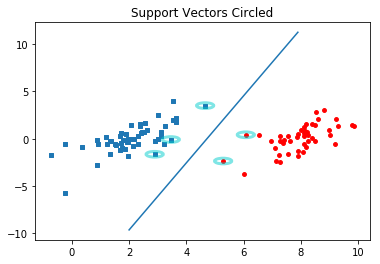

In [70]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

xcord0 = []
ycord0 = []
xcord1 = []
ycord1 = []
markers =[]
colors =[]
fr = open('testSet.txt')#this file was generated by 2normalGen.py
for line in fr.readlines():
    lineSplit = line.strip().split('\t')
    xPt = float(lineSplit[0])
    yPt = float(lineSplit[1])
    label = int(lineSplit[2])
    if (label == -1):
        xcord0.append(xPt)
        ycord0.append(yPt)
    else:
        xcord1.append(xPt)
        ycord1.append(yPt)

fr.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord0,ycord0, marker='s', s=20)
ax.scatter(xcord1,ycord1, marker='o', s=15, c='red')
plt.title('Support Vectors Circled')
for i in range(len(dataArr)):
    if alphas[i]>0.0:
        circle = Circle((dataArr[i][0], dataArr[i][1]), 0.3, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
        ax.add_patch(circle)
        
#b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
a = multiply(mat(alphas),mat(labelArr))
print(shape(mat(dataArr)))
print(shape(mat(alphas)))
print(shape(mat(labelArr)))

w = multiply(mat(alphas).T,mat(labelArr)) * mat(dataArr)
x = arange(2, 8.0, 0.1)
w[0,1]
y = (-w[0,0]*x - b)/w[0,1]
print(shape(x))


ax.plot(x,y.transpose())
#w1


In [10]:
b

0